# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [149]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [150]:
# Checking the number of mice.
len(complete_data['Mouse ID'].unique())

249

In [151]:
len(complete_data['Timepoint'].unique())

10

In [152]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_data_ID = complete_data.groupby(['Mouse ID'])['Timepoint'].count()
grouped_data_ID.loc[grouped_data_ID > 10]

Mouse ID
g989    13
Name: Timepoint, dtype: int64

In [153]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_data.loc[complete_data['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [154]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_data_clean = complete_data.loc[complete_data['Mouse ID'] != 'g989']

In [155]:
# Checking the number of mice in the clean DataFrame.
len(complete_data_clean['Mouse ID'].unique())

248

## Summary Statistics

In [156]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = complete_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_median = complete_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_variance = complete_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_std = complete_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_sem = complete_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

tumor_statistics_df = pd.DataFrame({
    'Mean Tumor Volume': tumor_mean,
    'Median Tumor Volume': tumor_median,
    'Tumor Volume Variance': tumor_variance,
    'Tumor Volume Std. Dev.': tumor_std,
    'Tumor Volume Std. Err.': tumor_sem
})

tumor_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [157]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

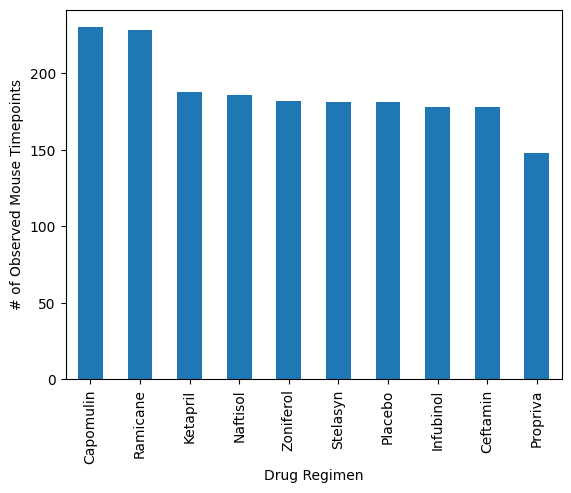

In [158]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_value_counts = complete_data_clean['Drug Regimen'].value_counts()
drug_regimen_value_counts.plot(kind='bar')
plt.ylabel('# of Observed Mouse Timepoints')

<BarContainer object of 10 artists>

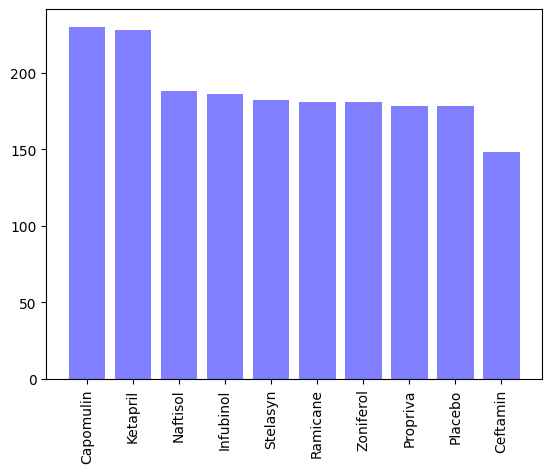

In [159]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_unique = complete_data_clean['Drug Regimen'].unique()
plt.xticks(rotation=90)
plt.bar(drug_regimen_unique, drug_regimen_value_counts, color='b', alpha=0.5, align='center')

Text(0, 0.5, 'Sex')

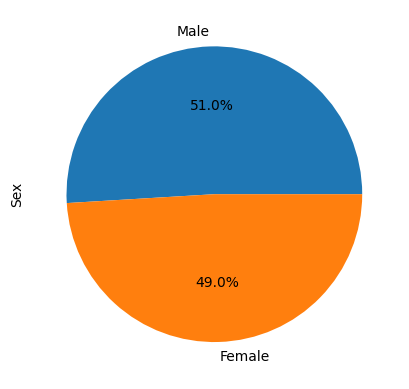

In [160]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_value_counts = complete_data_clean['Sex'].value_counts()
sex_value_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Sex')


Text(0, 0.5, 'Sex')

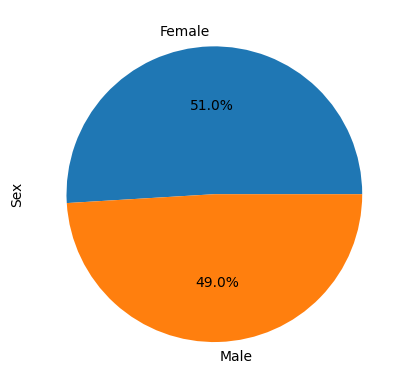

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_value_counts, labels=complete_data_clean['Sex'].unique(), autopct='%1.1f%%')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [162]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTimepoint = complete_data_clean.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
maxTimepoint_df = pd.merge(complete_data_clean, maxTimepoint, on=('Mouse ID', 'Timepoint'))
maxTimepoint_df = maxTimepoint_df.reset_index()
maxTimepoint_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,45,38.982878,2,Capomulin,Female,9,22
1,1,f932,0,45.000000,0,Ketapril,Male,15,29
2,2,g107,35,71.905117,0,Ketapril,Female,2,29
3,3,a457,10,49.783419,0,Ketapril,Female,11,30
4,4,c819,40,62.175705,1,Ketapril,Male,21,25


In [163]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
maxTimepoint_tumor_volume_4treatments = [maxTimepoint_df.loc[maxTimepoint_df['Drug Regimen'] == drug_name]['Tumor Volume (mm3)'] for drug_name in treatments]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_volume_lower_bounds = []
tumor_volume_upper_bounds = []
for drug_name in treatments:
    x = maxTimepoint_df.loc[maxTimepoint_df['Drug Regimen'] == drug_name]
    quartiles = x['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
 
    tumor_volume_lower_bounds.append(lower_bound)
    tumor_volume_upper_bounds.append(upper_bound)

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

# Diplay potential outliers for each treatment
i = 0
for drug_name in treatments:
    x = maxTimepoint_df.loc[maxTimepoint_df['Drug Regimen'] == drug_name]
    outliers = x.loc[(x['Tumor Volume (mm3)'] < tumor_volume_lower_bounds[i]) | (x['Tumor Volume (mm3)'] > tumor_volume_upper_bounds[i])]['Tumor Volume (mm3)']
    print(f'{drug_name} potential outliers: {outliers}')
    i += 1


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


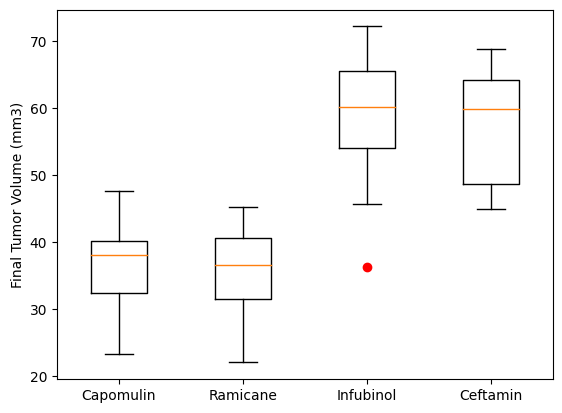

In [164]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1= plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(maxTimepoint_tumor_volume_4treatments, labels = treatments, sym= 'r')
plt.show()




## Line and Scatter Plots

<Axes: title={'center': 'Capomulin treatment of mouse l509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

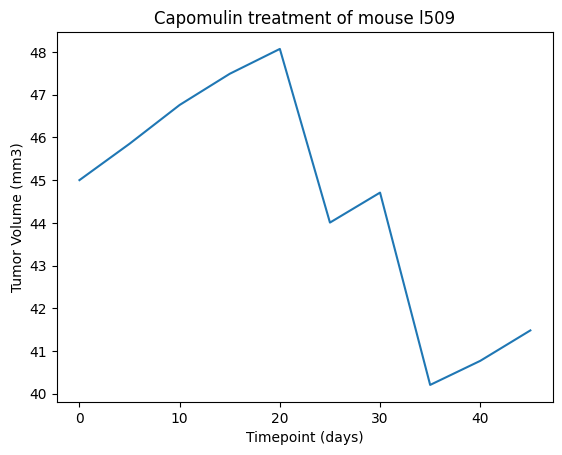

In [165]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_data = complete_data_clean.loc[complete_data_clean['Mouse ID'] == 'l509']

mouse_l509_data.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line', title='Capomulin treatment of mouse l509', 
                     xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)', legend=None)

Text(0, 0.5, 'Average Tumor Volume (mm3)')

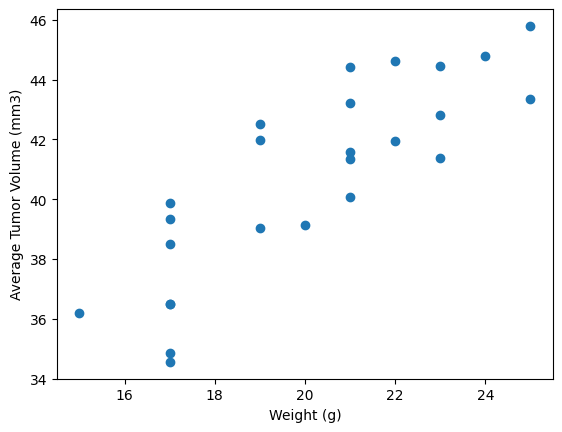

In [166]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
complete_capomulin_df = complete_data_clean.loc[complete_data_clean['Drug Regimen'] == 'Capomulin']
y_axis = complete_capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
x_axis= complete_capomulin_df.groupby(['Mouse ID'])['Weight (g)'].mean()
plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


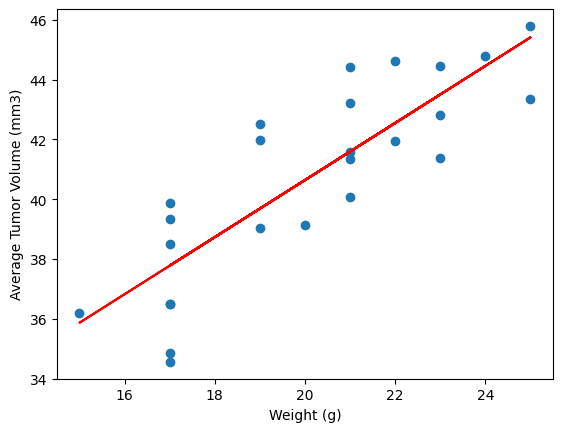

In [167]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

correlation = st.pearsonr(x_axis, y_axis)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')